# Data preparation and exploration

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [53]:
data = pd.read_csv("diabetes.csv")

In [54]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


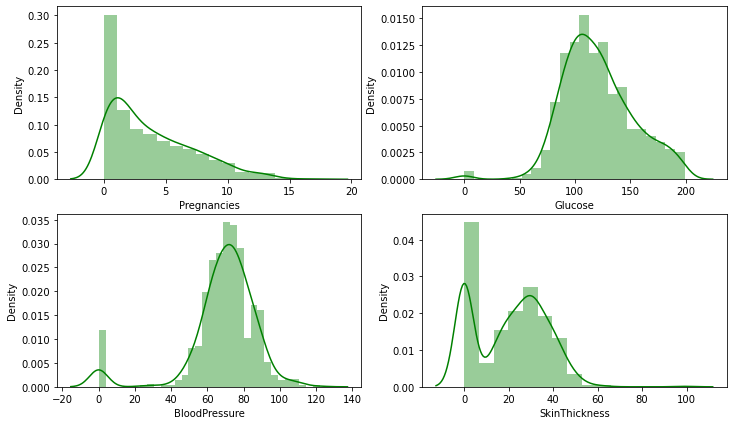

In [55]:
fig, grid = plt.subplots(nrows=2, ncols=2, figsize=(12,7))

g0 = sns.distplot(data['Pregnancies'], ax=grid[0][0], color="g")
g1 = sns.distplot(data['Glucose'], ax=grid[0][1], color="g")
g2 = sns.distplot(data['BloodPressure'], ax=grid[1][0], color="g")
g3 = sns.distplot(data['SkinThickness'], ax=grid[1][1], color="g")

plt.show()

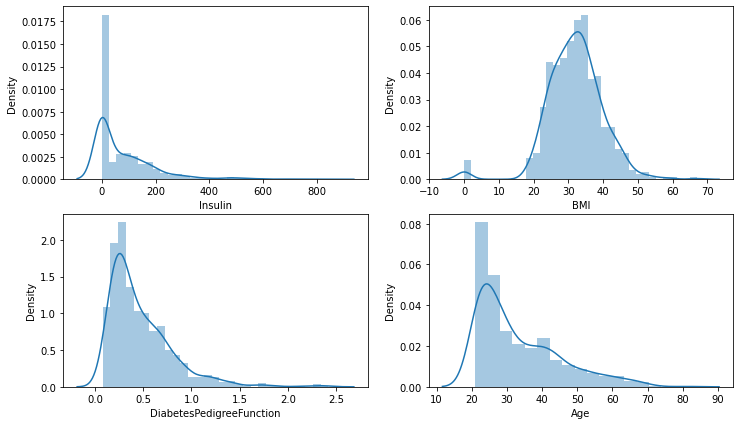

In [56]:
fig, grid = plt.subplots(nrows=2, ncols=2, figsize=(12,7))

g4 = sns.distplot(data['Insulin'], ax=grid[0][0])
g5 = sns.distplot(data['BMI'], ax=grid[0][1])
g6 = sns.distplot(data['DiabetesPedigreeFunction'], ax=grid[1][0])
g7 = sns.distplot(data['Age'], ax=grid[1][1])

plt.show()

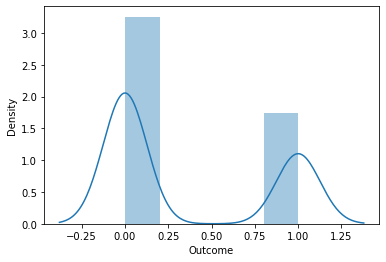

In [57]:
sns.distplot(data.Outcome)
plt.show()

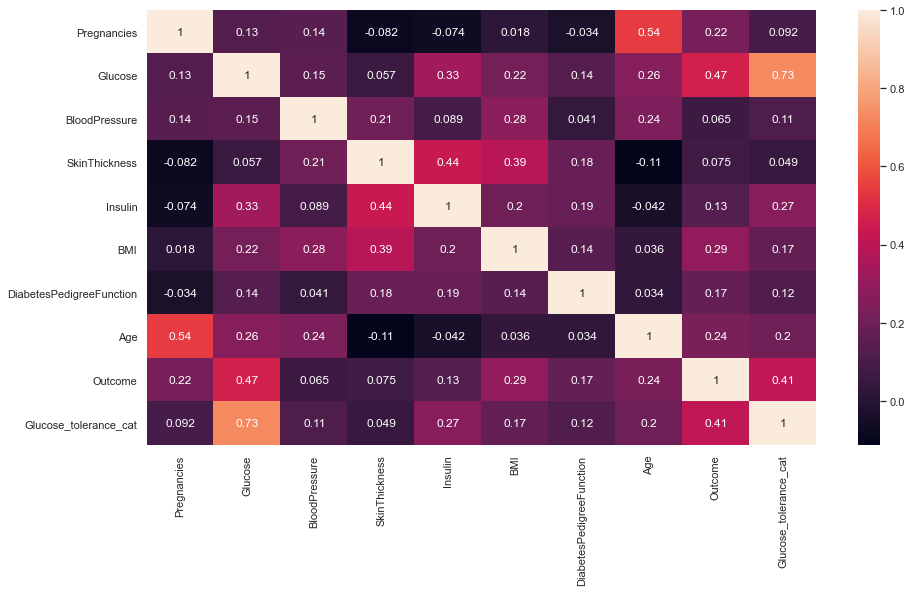

In [147]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot=True)
plt.show()

In [62]:
data['Glucose_tolerance_cat'] = data.Glucose.apply(lambda x: 0 if x < 155 else 1)


In [63]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_tolerance_cat
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


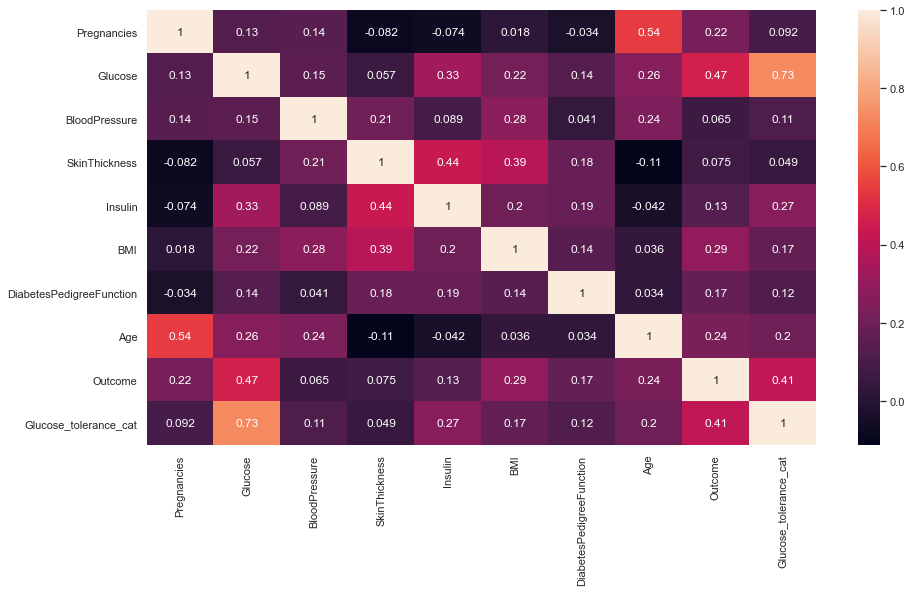

In [146]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot=True)
plt.show()

In [14]:
column_variences = {}

for column in tuple(data.columns)[:-2]:
    column_variences[column] = np.var(data[column])

In [15]:
column_variences

{'Pregnancies': 11.33927239312061,
 'Glucose': 1020.9172617594401,
 'BloodPressure': 374.1594492594401,
 'SkinThickness': 254.14189995659854,
 'Insulin': 13263.886874728778,
 'BMI': 62.0790464782714,
 'DiabetesPedigreeFunction': 0.10963569693840873,
 'Age': 138.12296379937058,
 'Outcome': 0.22718641493055383}

In [16]:
column_to_varience = pd.DataFrame(columns=['Column', 'Varience'], data=list(column_variences.items()))

In [17]:
column_to_varience

,Column,Varience
0,Pregnancies,11.339272
1,Glucose,1020.917262
2,BloodPressure,374.159449
3,SkinThickness,254.141900
4,Insulin,13263.886875
5,BMI,62.079046
6,DiabetesPedigreeFunction,0.109636
7,Age,138.122964
8,Outcome,0.227186


# Model preparation and fitting

In [93]:
from sklearn.metrics import recall_score, f1_score
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [120]:
columns_to_drop = ['Outcome', 'Glucose']

labels = data['Outcome']
data_without_columns_to_drop = data.drop(columns_to_drop, axis=1)

In [127]:
train_df, test_df, train_labels, test_labels = train_test_split(data_without_columns_to_drop,
                                                                labels,
                                                                random_state=42,
                                                                shuffle=True,
                                                                test_size=0.2)

In [128]:
train_df

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_tolerance_cat
60,2,0,0,0,0.0,0.304,21,0
618,9,82,24,0,28.2,1.282,50,0
346,1,46,19,83,28.7,0.654,22,0
294,0,50,0,0,21.9,0.254,65,1
231,6,80,37,370,46.2,0.238,46,0
...,...,...,...,...,...,...,...,...
71,5,64,35,140,28.6,0.411,26,0
106,1,122,0,0,22.4,0.207,27,0
270,10,86,37,0,45.6,1.136,38,0
435,0,0,0,0,42.4,0.205,29,0


In [139]:
model = CatBoostClassifier(depth=5)

In [140]:
model.fit(train_df, train_labels, 
          cat_features=['Glucose_tolerance_cat'], 
          metric_period=50)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.008365
0:	learn: 0.6889616	total: 1.21ms	remaining: 1.21s
50:	learn: 0.5581953	total: 38.2ms	remaining: 710ms
100:	learn: 0.4983671	total: 69.7ms	remaining: 621ms
150:	learn: 0.4612008	total: 103ms	remaining: 577ms
200:	learn: 0.4381920	total: 138ms	remaining: 548ms
250:	learn: 0.4209539	total: 173ms	remaining: 517ms
300:	learn: 0.4050349	total: 218ms	remaining: 506ms
350:	learn: 0.3927424	total: 262ms	remaining: 484ms
400:	learn: 0.3811436	total: 294ms	remaining: 439ms
450:	learn: 0.3706253	total: 324ms	remaining: 395ms
500:	learn: 0.3599660	total: 355ms	remaining: 354ms
550:	learn: 0.3513511	total: 389ms	remaining: 317ms
600:	learn: 0.3428712	total: 420ms	remaining: 279ms
650:	learn: 0.3341518	total: 451ms	remaining: 242ms
700:	learn: 0.3252923	total: 481ms	remaining: 205ms
750:	learn: 0.3169253	total: 511ms	remaining: 169ms
800:	learn: 0.3086339	total: 541ms	remaining: 134ms
850:	learn: 0.3007624	total: 571ms	remaining: 99.9ms
900:	learn: 0.2935659	total: 604m

In [141]:
test_df

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_tolerance_cat
668,6,58,33,190,34.0,0.430,43,0
324,2,75,32,0,35.7,0.148,21,0
624,2,64,0,0,30.8,0.158,21,0
690,8,80,0,0,24.6,0.856,34,0
473,7,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
355,9,88,0,0,30.4,0.302,49,1
534,1,56,30,56,33.3,1.251,24,0
344,8,72,0,0,36.8,0.485,57,0
296,2,70,38,360,28.0,0.337,29,0


In [143]:
preds = model.predict(test_df)

In [144]:
preds

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [145]:
recall_score(preds, test_labels)

0.6785714285714286